In [4]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O data/sonnets.txt
data = open('data/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [9]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 9s 580us/sample - loss: 6.8978 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 4s 272us/sample - loss: 6.4990 - accuracy: 0.0217
Epoch 3/100
15462/15462 [==============================] - 4s 276us/sample - loss: 6.3984 - accuracy: 0.0262
Epoch 4/100
15462/15462 [==============================] - 4s 273us/sample - loss: 6.2759 - accuracy: 0.0318
Epoch 5/100
15462/15462 [==============================] - 4s 276us/sample - loss: 6.1772 - accuracy: 0.0347
Epoch 6/100
15462/15462 [==============================] - 4s 275us/sample - loss: 6.0914 - accuracy: 0.0389
Epoch 7/100
15462/15462 [==============================] - 4s 274us/sample - loss: 6.0093 - accuracy: 0.0409
Epoch 8/100
15462/15462 [==============================] - 4s 273us/sample - loss: 5.9216 - accuracy: 0.0457
Epoch 9/100
15462/15462 [==============================] - 4s 274us/sample - loss: 5.8196 - accuracy: 0.0

15462/15462 [==============================] - 4s 285us/sample - loss: 1.4829 - accuracy: 0.7418
Epoch 76/100
15462/15462 [==============================] - 4s 285us/sample - loss: 1.4685 - accuracy: 0.7442
Epoch 77/100
15462/15462 [==============================] - 4s 286us/sample - loss: 1.4314 - accuracy: 0.7552
Epoch 78/100
15462/15462 [==============================] - 4s 284us/sample - loss: 1.4199 - accuracy: 0.7549
Epoch 79/100
15462/15462 [==============================] - 4s 284us/sample - loss: 1.4022 - accuracy: 0.7601
Epoch 80/100
15462/15462 [==============================] - 4s 285us/sample - loss: 1.3918 - accuracy: 0.7597
Epoch 81/100
15462/15462 [==============================] - 4s 285us/sample - loss: 1.3796 - accuracy: 0.7599
Epoch 82/100
15462/15462 [==============================] - 4s 285us/sample - loss: 1.3600 - accuracy: 0.7619
Epoch 83/100
15462/15462 [==============================] - 4s 285us/sample - loss: 1.3327 - accuracy: 0.7676
Epoch 84/100
15462/1546

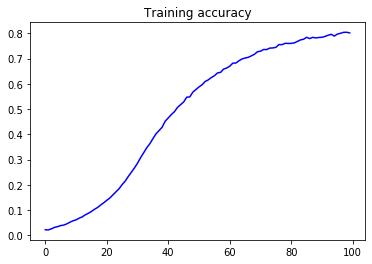

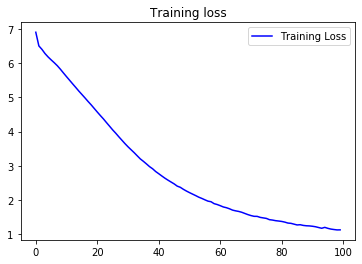

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy sins are tell me they go long before confound room go a tomb new end weeds fitted quite dwells staineth staineth warm'd sounds torn days doth shouldst too souls hate new ill dead days new young days new must prove thee hold her pain thee behold her argument too praise alone go to recite dyed dyed torn days dearer than out good date fired light light light dyed dyed torn dyed arising drink doth be inherit false not not me thy thought to praise go to cross burn'd shown ground dyed taken decays hate ' who dearer speaking days
